Model Training


In [39]:
# basic import 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Modelling
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [40]:
dataset = pd.read_csv("./data/cleaned_data.csv")

In [41]:
dataset.head(4)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333


 Preparing X and Y variables

In [42]:
X = dataset.drop(columns=['average'],axis=1)

In [43]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [44]:
print("Categories in 'gender' variable:     ",end=" " )
print(dataset['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(dataset['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(dataset['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(dataset['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(dataset['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [45]:
y = dataset['average']

In [46]:
y.head(5)

0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
Name: average, dtype: float64

 you are creating a ColumnTransformer to preprocess both numerical and categorical features of your dataset in one step. This allows you to apply different preprocessing techniques to different columns in your dataset, which is especially useful in machine learning pipelines.

1) OneHotEncoder: Transforms categorical variables into a set of binary (0 or 1) columns, representing each possible category as a separate column.

2) StandardScaler: Scales numerical features so that they have a mean of 0 and a standard deviation of 1, which is often beneficial for machine learning models.

3) ColumnTransformer: A utility that allows you to apply different preprocessing transformers to different subsets of the columns

In [47]:
# Create Column Transformer with 3 types of transformers
X = pd.DataFrame(X)

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler() # instance of StandardScaler to  scale the numerical cols
oh_transformer = OneHotEncoder()   # instance of OHE to encode the categorical cols

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)


Why is this Useful?
- Consistency in Preprocessing: Ensures that both numerical and categorical data are preprocessed consistently across your training and testing sets.
- Efficiency: You can combine different transformations into a single preprocessing step, reducing the amount of code you need to write.
- Pipeline Integration: The ColumnTransformer can be easily integrated into a machine learning pipeline, allowing you to streamline your entire workflow, from preprocessing to model training and evaluation.

In [48]:
X = preprocessor.fit_transform(X)

In [49]:
X.shape

(1000, 21)

In [50]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 21), (200, 21))

#### Create an Evaluate Function to give all metrics after model Training

In [51]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [52]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000




Lasso
Model performance for Training set
- Root Mean Squared Error: 1.0090
- Mean Absolute Error: 0.8075
- R2 Score: 0.9949
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.0557
- Mean Absolute Error: 0.8312
- R2 Score: 0.9948


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0059
- Mean Absolute Error: 0.0048
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0064
- Mean Absolute Error: 0.0049
- R2 Score: 1.0000


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1.9820
- Mean Absolute Error: 1.5577
- R2 Score: 0.9803
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.6661
- Mean Absolute Error: 1.9230
- R2 Score: 0.9668


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
---------------------------

Results

In [53]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,1.000000
4,Decision Tree,0.997613
6,XGBRegressor,0.997431
5,Random Forest Regressor,0.996187
7,CatBoosting Regressor,0.994961
1,Lasso,0.994801
8,AdaBoost Regressor,0.987691
3,K-Neighbors Regressor,0.966842


Linear Regression

In [54]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


## Plot y_pred and y_test

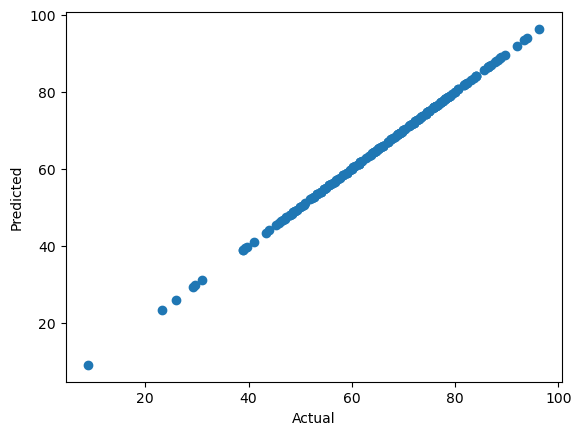

In [55]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

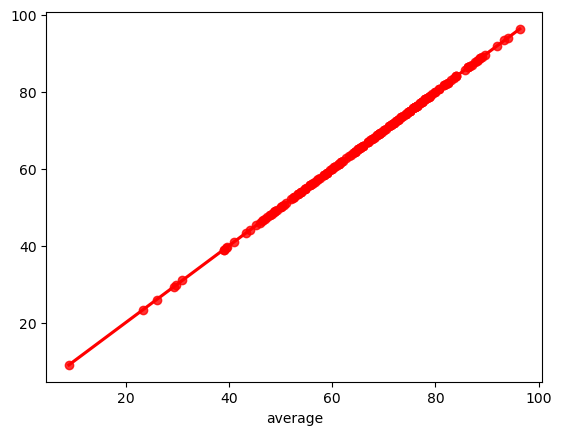

In [56]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


#### Difference between Actual and Predicted Values

In [57]:
pred_dataset=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_dataset

,Actual Value,Predicted Value,Difference
521,87.000000,87.000000,0.000000e+00
737,64.000000,64.000000,1.421085e-14
740,75.000000,75.000000,0.000000e+00
660,74.666667,74.666667,1.421085e-14
411,81.666667,81.666667,1.421085e-14
...,...,...,...
408,55.000000,55.000000,7.105427e-15
332,57.000000,57.000000,1.421085e-14
208,77.000000,77.000000,0.000000e+00
613,72.000000,72.000000,1.421085e-14
